# Modifying cytosim objects
Requires Python>=3.7  
Before running, copy or move the cytosim module (cytosim.---.so) to the current folder.

Here we showcase by changing a fiber.

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_sim(sim):
    space = sim.spaces[0]
    plt.figure()
    r = np.linspace(0,2.0*np.pi,100)
    plt.plot(5.0* np.cos(r),5.0*np.sin(r),color="black")
    for fiber in sim.fibers:
        p = fiber.points()
        plt.plot(p[:,0],p[:,1])
        plt.scatter(p[:,0],p[:,1])
    

        
    plt.axis('equal')
    plt.show()
    


## Fiber simulation
Here we simulate and a fiber. Each point correspond to the end of a segment.

In [3]:
sim = cytosim.start("cym/fiber.cym")

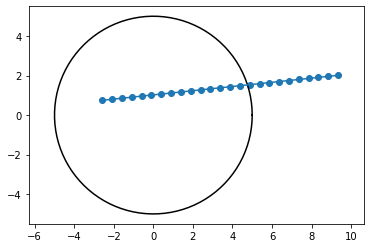

In [4]:
plot_sim(sim)

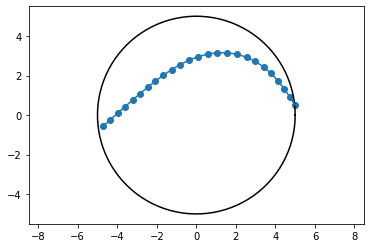

In [5]:
sim.run(10)
plot_sim(sim)

### Changing object properties
Cythosim offers to ways to change a property : through directly accessing the property members, or by sending a change string.

In [6]:
fil_prop = sim.findProperty("filament")
print(f"Segmentation : {fil_prop.segmentation}")

Segmentation : 0.5


Resegmenting f1:0001 -> 2


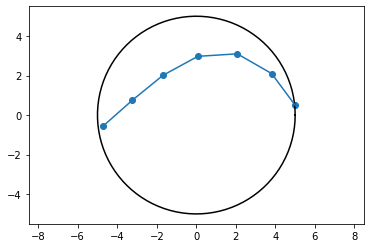

In [7]:
# Changing directly property members
fil_prop.segmentation = 2.0
fil_prop.complete(sim)
plot_sim(sim)

Resegmenting f1:0001 -> 1


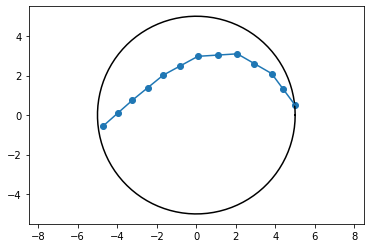

In [8]:
#Alternative : sending a change string
sim.change("filament","segmentation = 1.0")
plot_sim(sim)

### Changing objects
To know which functions are accessible to an object, use dir(object). To know what these functions do please refer to the cytosim documentation : these functions should mirror C++ functions.

In [9]:
print(dir(sim.fibers[0]))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'aboveM', 'abscissaC', 'abscissaEnd', 'abscissaFrom', 'abscissaM', 'abscissaP', 'abscissaPoint', 'addSegmentM', 'addSegmentP', 'adjustLength', 'age', 'avgDirection', 'belowP', 'bendingEnergy0', 'betweenMP', 'birthTime', 'clampedIndexM', 'curvature', 'cutM', 'cutP', 'dragCoefficient', 'flipChainPolarity', 'freshAssembly', 'grow', 'growM', 'growP', 'id', 'join', 'lastSegment', 'leftoverMobility', 'length', 'length1', 'nbHands', 'nbHandsInRange', 'nbPoints', 'nbSegments', 'netForceEndM', 'netForceEndP', 'next', 'nowSever', 'outsideMP', 'placeEnd', 'planarIntersect', 'points', 'pos', 'posEnd', 'posEndM', 'posEndP', 'posFrom', 'posM', 'posMiddle', 'position', 'prev',

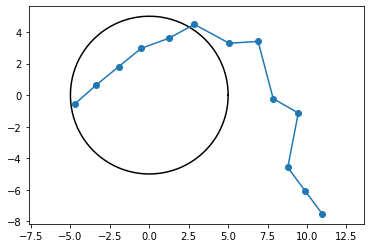

In [10]:
sim.fibers[0].growM(10)
plot_sim(sim)

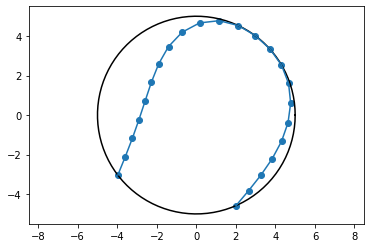

In [11]:
sim.run(10)
plot_sim(sim)

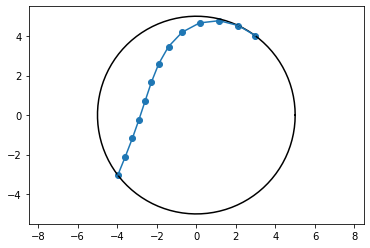

In [12]:
sim.fibers[0].cutM(10)
plot_sim(sim)

### Adding Objects

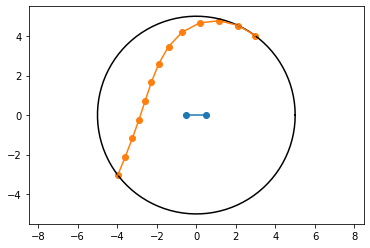

In [13]:
# Adding a single object
sim.fibers.addObject("filament")
plot_sim(sim)

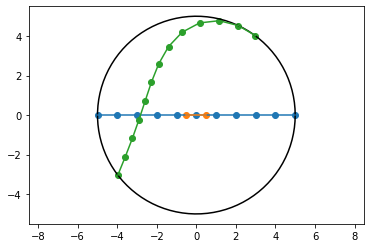

In [14]:
# Adding with instructions
sim.fibers.addObject("filament","length = 10",)
plot_sim(sim)

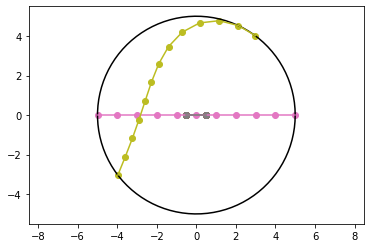

In [16]:
# Adding several (3) objects
sim.fibers.addObject("filament","position = 2 1 0 ; orientation = 1 0",3)
plot_sim(sim)